# **Python notebook 02**
W2054006

In [ ]:
# Imports
import pandas as pd
import plotly.express as px

In [ ]:
# import dataset
df = pd.read_csv('/content/drive/MyDrive/ML Folder/CW_py2/5DATA002W.2 Coursework Dataset(25012025v6.0).csv')
df.head()

,Patient_ID,Month_of_Birth,Age,Sex,Occupation,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,A0012,12,68.0,Female,Teaching,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,60,Alive
1,A0013,12,50.0,Female,Medical,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,62,Alive
2,A0014,11,58.0,Female,Engineering,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,75,Alive
3,A0015,3,58.0,Female,Technology,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1,84,Alive
4,A0016,1,47.0,Female,Multimedia,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1,50,Alive


In [ ]:
# Check all attributes
list(df.columns)

['Patient_ID',
 'Month_of_Birth',
 'Age',
 'Sex',
 'Occupation',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive',
 'Survival_Months',
 'Mortality_Status']

In [ ]:
# Check the number of rows and columns in the dataset
df.shape

(4024, 18)

In [ ]:
# Check for null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              4024 non-null   object 
 1   Month_of_Birth          4024 non-null   int64  
 2   Age                     4015 non-null   float64
 3   Sex                     4020 non-null   object 
 4   Occupation              43 non-null     object 
 5   T_Stage                 4024 non-null   object 
 6   N_Stage                 4024 non-null   object 
 7   6th_Stage               4024 non-null   object 
 8   Differentiated          4024 non-null   object 
 9   Grade                   4024 non-null   int64  
 10  A_Stage                 4024 non-null   object 
 11  Tumor_Size              4021 non-null   float64
 12  Estrogen_Status         4024 non-null   object 
 13  Progesterone_Status     4024 non-null   object 
 14  Regional_Node_Examined  4023 non-null   

In [ ]:
# Check for distribution
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Month_of_Birth,4024.0,6.481362,3.475442,1.0,3.0,6.0,10.0,12.0
Age,4015.0,54.107098,11.715528,-50.0,47.0,54.0,61.0,502.0
Grade,4024.0,2.150596,0.638234,1.0,2.0,2.0,3.0,4.0
Tumor_Size,4021.0,30.419299,21.161080,-75.0,16.0,25.0,38.0,140.0
Regional_Node_Examined,4023.0,14.373602,8.129293,1.0,9.0,14.0,19.0,61.0
Reginol_Node_Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0
Survival_Months,4024.0,71.472167,25.361855,1.0,56.0,73.0,90.0,760.0


In [ ]:
# Check null value percentage
df.isna().sum()/len(df)*100

,0
Patient_ID,0.000000
Month_of_Birth,0.000000
Age,0.223658
Sex,0.099404
Occupation,98.931412
T_Stage,0.000000
N_Stage,0.000000
6th_Stage,0.000000
Differentiated,0.000000
Grade,0.000000


In [ ]:
# Remove unanted columns
df.drop(['Patient_ID', 'Sex', 'Occupation'], axis=1, inplace=True)

In [ ]:
# Remove rows with null values
df.dropna(inplace=True)

In [ ]:
# Check for unique values in columns with object data type
print(df['T_Stage'].unique())
print(df['N_Stage'].unique())
print(df['6th_Stage'].unique())
print(df['Differentiated'].unique())
print(df['A_Stage'].unique())
print(df['Estrogen_Status'].unique())
print(df['Progesterone_Status'].unique())
print(df['Mortality_Status'].unique())

['T1' 'T2' 'T3' 'T4']
['N1' 'N2' 'N3']
['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
['Regional' 'Distant']
['Positive' 'Negative']
['Positive' 'Negative']
['Alive' 'Dead' 'ALIVE' 'DEAD' 'ALive' 'alive' 'dead']


In [ ]:
# Change all mortality status values to lowercase
df['Mortality_Status'] = df['Mortality_Status'].str.lower()

In [ ]:
# Map unique object values into integers
df['Mortality_Status'] = df['Mortality_Status'].map({'dead': 0, 'alive': 1})

df['T_Stage'] = df['T_Stage'].map({'T1': 0, 'T2': 1, 'T3': 2, 'T4': 3})

df['N_Stage'] = df['N_Stage'].map({'N1': 0, 'N2': 1, 'N3': 2})

df['6th_Stage'] = df['6th_Stage'].map({'IIA': 0, 'IIIA': 1, 'IIB': 2, 'IIIB': 3})

df['Differentiated'] = df['Differentiated'].map({'Poorly differentiated': 0, 'Moderately differentiated': 1, 'Well differentiated': 2, 'Undifferentiated': 3})

df['A_Stage'] = df['A_Stage'].map({'Regional': 0, 'Distant': 1})

df['Estrogen_Status'] = df['Estrogen_Status'].map({'Negative': 0, 'Positive': 1})

df['Progesterone_Status'] = df['Progesterone_Status'].map({'Negative': 0, 'Positive': 1})

In [ ]:
# Check distribution of values
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Month_of_Birth,4011.0,6.485415,3.475812,1.0,4.0,6.0,10.0,12.0
Age,4011.0,54.112939,11.715665,-50.0,47.0,54.0,61.0,502.0
T_Stage,4011.0,0.783346,0.764344,0.0,0.0,1.0,1.0,3.0
N_Stage,4011.0,0.438544,0.693684,0.0,0.0,0.0,1.0,2.0
6th_Stage,3540.0,0.988701,0.873060,0.0,0.0,1.0,2.0,3.0
Differentiated,4011.0,0.867863,0.642231,0.0,0.0,1.0,1.0,3.0
Grade,4011.0,2.151085,0.638038,1.0,2.0,2.0,3.0,4.0
A_Stage,4011.0,0.022688,0.148924,0.0,0.0,0.0,0.0,1.0
Tumor_Size,4011.0,30.346547,21.008621,-75.0,16.0,25.0,38.0,140.0
Estrogen_Status,4011.0,0.932934,0.250167,0.0,1.0,1.0,1.0,1.0


In [ ]:
# Check for outliers in age
age_fig = px.box(df, x='Age', title="Age Outliers")
age_fig.show()

# Check for outliers in tumor size
tumor_fig = px.box(df, x='Tumor_Size', title="Tumor_Size Outliers")
tumor_fig.show()

In [ ]:
# Remove outliers in age
Q1 = df['Age'].quantile(0.25)  # 25th percentile
Q3 = df['Age'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

df = df[(df['Age'] >= lower_fence) & (df['Age'] <= upper_fence)]

age_fig = px.box(df, x='Age', title="Boxplot of Age (Detecting Outliers)")
age_fig.show()

In [ ]:
# Remove outliers in tumor size
Q1 = df['Tumor_Size'].quantile(0.25)  # 25th percentile
Q3 = df['Tumor_Size'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

df = df[(df['Tumor_Size'] >= lower_fence)]

age_fig = px.box(df, x='Tumor_Size', title="Boxplot of Tumor_Size (Detecting Outliers)")
age_fig.show()

In [ ]:
# Check available rows and columns
df.shape

(4006, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4006 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month_of_Birth          4006 non-null   int64  
 1   Age                     4006 non-null   float64
 2   T_Stage                 4006 non-null   int64  
 3   N_Stage                 4006 non-null   int64  
 4   6th_Stage               3537 non-null   float64
 5   Differentiated          4006 non-null   int64  
 6   Grade                   4006 non-null   int64  
 7   A_Stage                 4006 non-null   int64  
 8   Tumor_Size              4006 non-null   float64
 9   Estrogen_Status         4006 non-null   int64  
 10  Progesterone_Status     4006 non-null   int64  
 11  Regional_Node_Examined  4006 non-null   float64
 12  Reginol_Node_Positive   4006 non-null   int64  
 13  Survival_Months         4006 non-null   int64  
 14  Mortality_Status        4006 non-null   int64

### **Linear Regression Model**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Independent columns (features)
X = df[['Month_of_Birth', 'Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade',
          'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined',
          'Reginol_Node_Positive', 'Survival_Months']]

# Target column (label)
y = df['Mortality_Status']


In [ ]:
# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [ ]:
# Drop rows with NaN values
data_cleaned = df.dropna()

In [ ]:
# Redefine X and y after cleaning
X_cleaned = data_cleaned[['Month_of_Birth', 'Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade',
                          'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status',
                          'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months']]
y_cleaned = data_cleaned['Mortality_Status']

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, random_state=42, test_size=0.25)

In [ ]:
# Step 4: Instantiate the Linear Regression model
model = LinearRegression()

# Step 5: Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Step 6: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 7: Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation results
print(f"R2 Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

#print the slope and intercept for linear regression model
print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

R2 Score: 0.18826614940781217
Mean Squared Error (MSE): 0.08206624306590289
Slope: [ 0.00241378 -0.00298311 -0.02844219 -0.04063167 -0.009986   -0.08023665
 -0.11850865 -0.0250168   0.00024531  0.1086639   0.05600022  0.00229882
 -0.00768426  0.00600101]
Intercept: 0.7811916106066467


In [ ]:
y_pred_Train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_Train)
mse_train = mean_squared_error(y_train, y_pred_Train)
print(f"R2 Score: {r2_train}")
print(f"Mean Squared Error (MSE): {mse_train}")

R2 Score: 0.24108576175216745
Mean Squared Error (MSE): 0.08354213306419628


The model's performance is limited, with an R² score of 0.24 indicating it explains only 24% of the variance, and an MSE of 0.0835 suggesting the predictions are moderately inaccurate.

In [ ]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head()

,Actual,Predicted
831,1,1.018229
334,1,0.910543
1684,1,1.018017
2852,0,0.582754
2508,1,0.927969


[[ 32  69]
 [  9 775]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



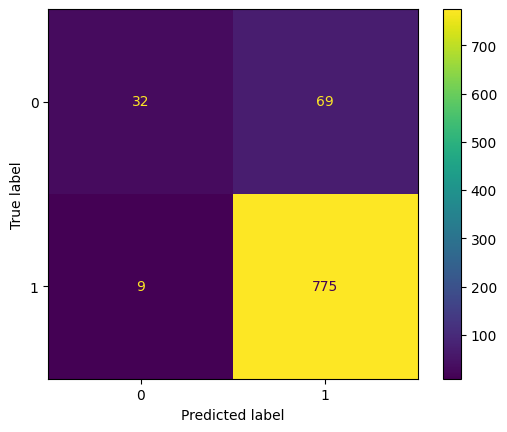

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()


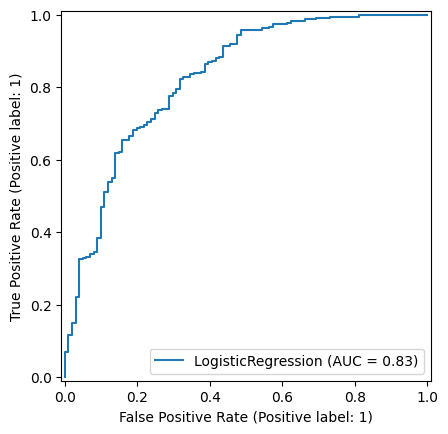

In [ ]:
from sklearn.metrics import RocCurveDisplay
logreg_roc = RocCurveDisplay.from_estimator(model, X_test, y_test)

## **kNN** **Model**

In [ ]:
X= data_cleaned[['Month_of_Birth', 'Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade',
                          'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status',
                          'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months']]
y= data_cleaned['Mortality_Status']
#check that the list of input variables
list(X)



['Month_of_Birth',
 'Age',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive',
 'Survival_Months']

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14, stratify=y)

#This is to show the number of instances and input features in the training and test sets
print('X_train Instances', X_train.shape)
print('X_test Instances', X_test.shape)


X_train Instances (2829, 14)
X_test Instances (708, 14)


Text(0, 0.5, 'Mean Error')

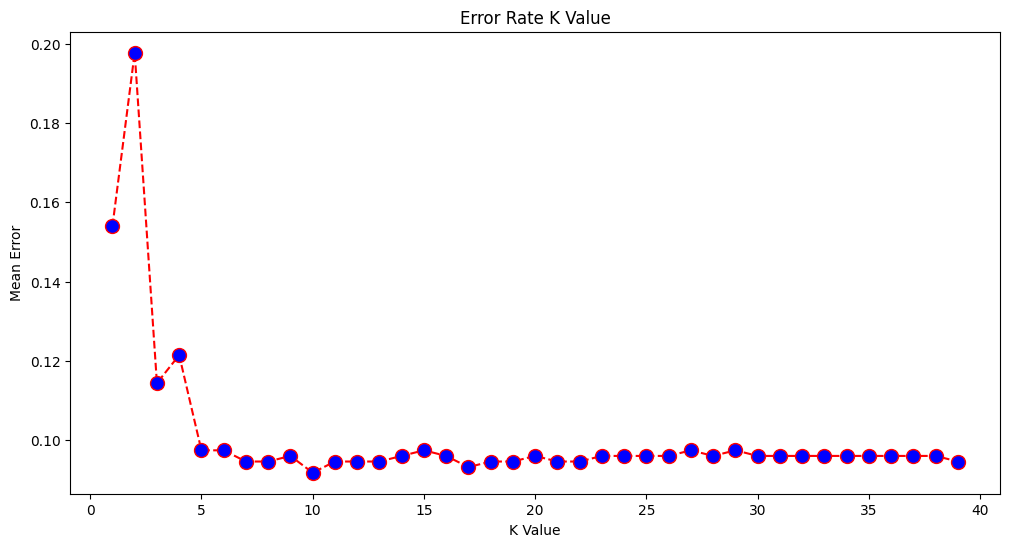

In [ ]:
# Calculating error for K values between 1 and 40
error = []
import numpy as np
import matplotlib.pyplot as plt
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    pred_i = knn2.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


### When k=10 has the lowest Error

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn1 = KNeighborsClassifier(n_neighbors = 10)
# Fit the classifier to the data
knn1.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=10)

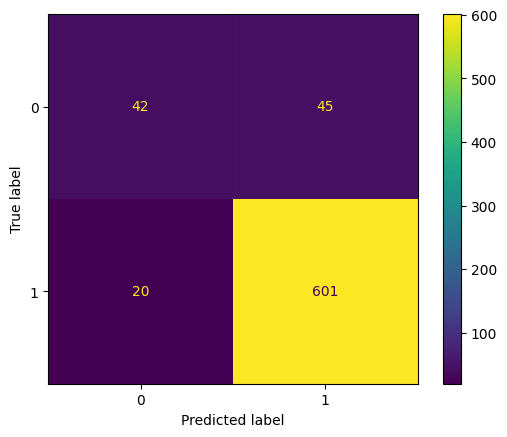

In [ ]:
#Perform predictions on the test data
y_pred=knn1.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_knn1 = confusion_matrix(y_test, y_pred, labels = knn1.classes_)
disp_knn1_cm = ConfusionMatrixDisplay(cm_knn1, display_labels=knn1.classes_)
disp_knn1_cm.plot()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.48      0.56        87
           1       0.93      0.97      0.95       621

    accuracy                           0.91       708
   macro avg       0.80      0.73      0.76       708
weighted avg       0.90      0.91      0.90       708



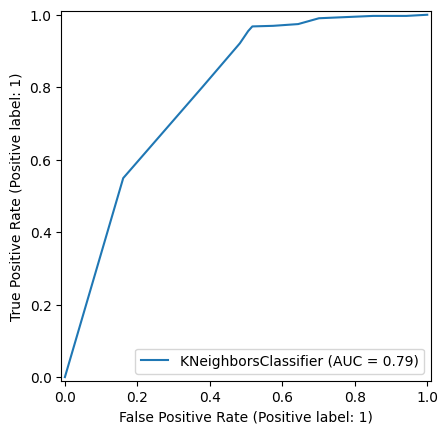

In [ ]:
from sklearn.metrics import RocCurveDisplay
knn_roc = RocCurveDisplay.from_estimator(knn1, X_test, y_test)


kNN model’s performance with Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors and distances
param_grid = {'n_neighbors': np.arange(1, 25), 'metric': ['euclidean', 'manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring = 'roc_auc')
#fit model to data
knn_gscv.fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             scoring='roc_auc')

In [ ]:
# Check top performing n_neighbors’ value
knn_gscv.best_params_


{'metric': 'manhattan', 'n_neighbors': 21}

              precision    recall  f1-score   support

           0       0.73      0.46      0.56        87
           1       0.93      0.98      0.95       621

    accuracy                           0.91       708
   macro avg       0.83      0.72      0.76       708
weighted avg       0.90      0.91      0.90       708



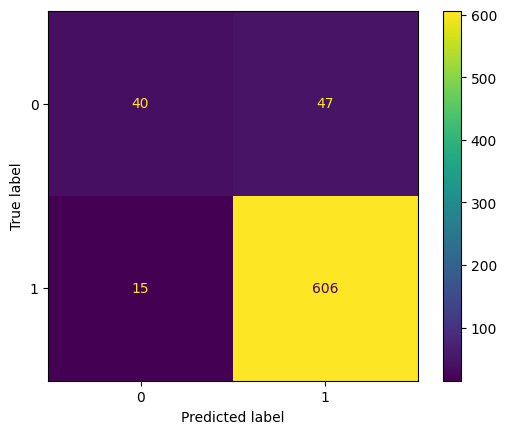

In [ ]:
# Perform testing on test dataset
y_pred = knn_gscv.predict(X_test)
# Construct a confusion matrix
cm_knn_gscv = confusion_matrix(y_test, y_pred, labels = knn_gscv.classes_)
disp_knn_gscv_cm = ConfusionMatrixDisplay(cm_knn_gscv, display_labels=knn_gscv.classes_)
disp_knn_gscv_cm.plot()
# Display the classification report
print(classification_report(y_test, y_pred))


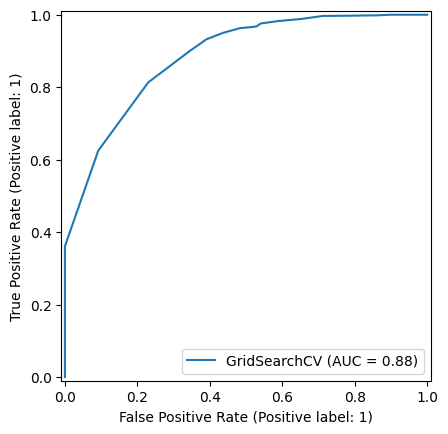

In [ ]:
from sklearn.metrics import RocCurveDisplay
knn_gscv_roc = RocCurveDisplay.from_estimator(knn_gscv, X_test, y_test)


### **Gaussian bold text Naive Bayes Classifier Model**

In [ ]:
# Perform Minimum - Maximum Normalization:
X1 = (X - np.min(X)) / (np.max(X) - np.min(X))


In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 42)


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X1_train, y_train)
y_pred=nb.predict(X1_test)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.33      0.28      0.30       124
           1       0.91      0.92      0.91       938

    accuracy                           0.85      1062
   macro avg       0.62      0.60      0.61      1062
weighted avg       0.84      0.85      0.84      1062



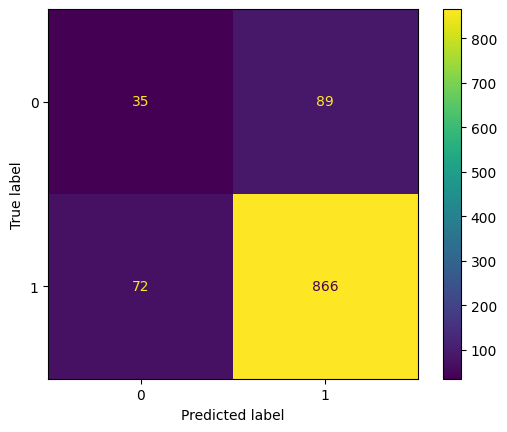

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
nb_cm = confusion_matrix(y_test, y_pred, labels = nb.classes_)
nb_cm = ConfusionMatrixDisplay(nb_cm, display_labels = nb.classes_)
nb_cm.plot()


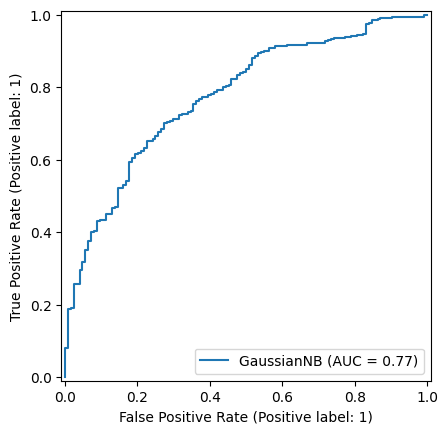

In [ ]:
from sklearn.metrics import RocCurveDisplay
nb_roc = RocCurveDisplay.from_estimator(nb, X1_test, y_test)
